In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=SOHAILA\SQLEXPRESS;'
    'DATABASE=Financial;'
    'Trusted_Connection=yes;'
)

conn = pyodbc.connect(conn_str)
print(" Connected successfully!")

 Connected successfully!


In [3]:
query = "SELECT * From Cards_cleaning as c join User_cleaned as u on c.client_id = u.id join transactions_data as t on t.card_id = c.id;"
df = pd.read_sql(query, conn)

df 

,id,client_id,card_brand,card_type,card_number,cvv,has_chip,num_cards_issued,credit_limit,card_on_dark_web,...,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description,is_fraud
0,2877,1622,Mastercard,Debit,5215629197170613,502,True,2,40176,No,...,8.3,Swipe Transaction,43293,Canton,MA,2021,5499,NO Error,Miscellaneous Food Stores,No
1,1166,34,Mastercard,Debit,5039048842448184,339,True,2,10775,No,...,4.07,Swipe Transaction,49789,Sacramento,CA,95829,5541,NO Error,Service Stations,No
2,4710,1424,Mastercard,Credit,5033949193863455,76,True,2,8000,No,...,2.31,Swipe Transaction,95811,Seligman,AZ,86337,5411,NO Error,"""Grocery Stores","Supermarkets"",No"
3,5952,121,Visa,Debit,4716535552633032,508,True,1,18137,No,...,0.21,Swipe Transaction,61195,Menasha,WI,54952,5541,NO Error,Service Stations,No
4,2493,474,Visa,Credit,4700082044427658,487,True,1,16900,No,...,91.02,Swipe Transaction,35451,Williston Park,NY,11596,5812,NO Error,Eating Places and Restaurants,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3876,1240,Visa,Debit,4191753432473688,915,True,1,23169,No,...,20.78,Swipe Transaction,60569,Berea,OH,44017,5300,NO Error,Wholesale Clubs,No
1048571,4165,602,Visa,Debit,4789489264488970,994,True,1,13361,No,...,79.04,Swipe Transaction,31707,Grantville,GA,30220,4111,NO Error,Local and Suburban Commuter Transportation,No
1048572,5909,1799,Visa,Debit,4461391532392446,981,True,2,47372,No,...,24.41,Online Transaction,88998,ONLINE,ONLINE,ONLINE,4784,NO Error,Tolls and Bridge Fees,No
1048573,4559,1742,Visa,Debit,4365366370182160,290,True,1,11737,No,...,7.47,Swipe Transaction,75781,Noblesville,IN,46062,5411,NO Error,"""Grocery Stores","Supermarkets"",No"


In [76]:
df.head()

,id,client_id,card_brand,card_type,card_number,cvv,has_chip,num_cards_issued,credit_limit,card_on_dark_web,...,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description,is_fraud
0,2877,1622,Mastercard,Debit,5215629197170613,502,True,2,40176,No,...,8.3,Swipe Transaction,43293,Canton,MA,2021,5499,NO Error,Miscellaneous Food Stores,No
1,1166,34,Mastercard,Debit,5039048842448184,339,True,2,10775,No,...,4.07,Swipe Transaction,49789,Sacramento,CA,95829,5541,NO Error,Service Stations,No
2,4710,1424,Mastercard,Credit,5033949193863455,76,True,2,8000,No,...,2.31,Swipe Transaction,95811,Seligman,AZ,86337,5411,NO Error,"""Grocery Stores","Supermarkets"",No"
3,5952,121,Visa,Debit,4716535552633032,508,True,1,18137,No,...,0.21,Swipe Transaction,61195,Menasha,WI,54952,5541,NO Error,Service Stations,No
4,2493,474,Visa,Credit,4700082044427658,487,True,1,16900,No,...,91.02,Swipe Transaction,35451,Williston Park,NY,11596,5812,NO Error,Eating Places and Restaurants,No


In [77]:
df.tail()

,id,client_id,card_brand,card_type,card_number,cvv,has_chip,num_cards_issued,credit_limit,card_on_dark_web,...,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description,is_fraud
1048570,3876,1240,Visa,Debit,4191753432473688,915,True,1,23169,No,...,20.78,Swipe Transaction,60569,Berea,OH,44017,5300,NO Error,Wholesale Clubs,No
1048571,4165,602,Visa,Debit,4789489264488970,994,True,1,13361,No,...,79.04,Swipe Transaction,31707,Grantville,GA,30220,4111,NO Error,Local and Suburban Commuter Transportation,No
1048572,5909,1799,Visa,Debit,4461391532392446,981,True,2,47372,No,...,24.41,Online Transaction,88998,ONLINE,ONLINE,ONLINE,4784,NO Error,Tolls and Bridge Fees,No
1048573,4559,1742,Visa,Debit,4365366370182160,290,True,1,11737,No,...,7.47,Swipe Transaction,75781,Noblesville,IN,46062,5411,NO Error,"""Grocery Stores","Supermarkets"",No"
1048574,2530,1817,Mastercard,Debit,5686575699244488,666,True,2,43033,No,...,77,Swipe Transaction,61195,Pearland,TX,77584,5541,NO Error,Service Stations,No


In [78]:
df.columns

Index(['id', 'client_id', 'card_brand', 'card_type', 'card_number', 'cvv',
       'has_chip', 'num_cards_issued', 'credit_limit', 'card_on_dark_web',
       'years_since_opened_when_pin_changed', 'cards_age_year', 'id',
       'current_age', 'retirement_age', 'birth_year', 'birth_month', 'gender',
       'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards',
       'debt_to_income', 'income_bin', 'years_to_retirement',
       'avg_debt_per_card', 'id', 'date', 'client_id', 'card_id', 'amount',
       'use_chip', 'merchant_id', 'merchant_city', 'merchant_state', 'zip',
       'mcc', 'errors', 'description', 'is_fraud'],
      dtype='object')

In [79]:
df.shape

(1048575, 44)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 44 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   id                                   1048575 non-null  int64  
 1   client_id                            1048575 non-null  int64  
 2   card_brand                           1048575 non-null  object 
 3   card_type                            1048575 non-null  object 
 4   card_number                          1048575 non-null  int64  
 5   cvv                                  1048575 non-null  int64  
 6   has_chip                             1048575 non-null  bool   
 7   num_cards_issued                     1048575 non-null  int64  
 8   credit_limit                         1048575 non-null  int64  
 9   card_on_dark_web                     1048575 non-null  object 
 10  years_since_opened_when_pin_changed  1048575 non-null  int64  
 11

In [81]:
df.describe()

,id,client_id,card_number,cvv,num_cards_issued,credit_limit,years_since_opened_when_pin_changed,cards_age_year,id,current_age,...,per_capita_income,yearly_income,total_debt,num_credit_cards,debt_to_income,years_to_retirement,avg_debt_per_card,id,client_id,card_id
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.398471e+03,1.030648e+03,4.796528e+15,4.980681e+02,1.532804e+00,1.532512e+04,4.884102e+00,1.474852e+01,1.030648e+03,5.475614e+01,...,2.397505e+04,4.660242e+04,5.715477e+04,3.882801e+00,1.223435e+00,1.172062e+01,2.085739e+04,8.414620e+06,1.030648e+03,3.398471e+03
std,1.685623e+03,5.829208e+02,1.354262e+15,2.858643e+02,5.159596e-01,1.204265e+04,4.232611e+00,4.672181e+00,5.829208e+02,1.548074e+01,...,1.204539e+04,2.466752e+04,5.143036e+04,1.569167e+00,8.759433e-01,1.590835e+01,2.940262e+04,5.441942e+05,5.829208e+02,1.685623e+03
min,0.000000e+00,0.000000e+00,3.001055e+14,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01,...,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-3.800000e+01,0.000000e+00,7.475327e+06,0.000000e+00,0.000000e+00
25%,2.253000e+03,5.140000e+02,4.482150e+15,2.550000e+02,1.000000e+00,8.100000e+03,1.000000e+00,1.217808e+01,5.140000e+02,4.300000e+01,...,1.710400e+04,3.258300e+04,1.589900e+04,3.000000e+00,4.207719e-01,2.000000e+00,3.602000e+03,7.943396e+06,5.140000e+02,2.253000e+03
50%,3.454000e+03,1.076000e+03,5.124182e+15,5.000000e+02,2.000000e+00,1.330000e+04,4.000000e+00,1.475890e+01,1.076000e+03,5.200000e+01,...,2.115900e+04,4.088700e+04,5.153900e+04,4.000000e+00,1.269231e+00,1.400000e+01,1.369880e+04,8.413340e+06,1.076000e+03,3.454000e+03
75%,4.753000e+03,1.534000e+03,5.570191e+15,7.410000e+02,2.000000e+00,2.070000e+04,7.000000e+00,1.759178e+01,1.534000e+03,6.400000e+01,...,2.737600e+04,5.399600e+04,8.416600e+04,5.000000e+00,1.864055e+00,2.400000e+01,2.552260e+04,8.885120e+06,1.534000e+03,4.753000e+03
max,6.034000e+03,1.998000e+03,6.994218e+15,9.990000e+02,3.000000e+00,1.413910e+05,2.500000e+01,3.327123e+01,1.998000e+03,1.010000e+02,...,1.631450e+05,2.801990e+05,4.618540e+05,9.000000e+00,4.678159e+00,4.700000e+01,3.179640e+05,9.361478e+06,1.998000e+03,6.034000e+03


In [83]:
df.describe(include='O')

,card_brand,card_type,card_on_dark_web,gender,address,credit_score,income_bin,date,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description,is_fraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
unique,4,3,1,2,1147,4,5,457058,34507,2,26881,7448,128,14477,109,13,112,71
top,Mastercard,Debit,No,Female,772 Fifth Boulevard,Good,Very High,2/7/2010 16:19,80,Swipe Transaction,59935,ONLINE,ONLINE,ONLINE,5411,NO Error,"""Grocery Stores",No
freq,562025,643930,1048575,533280,4115,291106,229107,13,11935,934900,49514,113675,113675,113675,125450,1032040,125447,854136


In [84]:
df.isna().sum()

id                                     0
client_id                              0
card_brand                             0
card_type                              0
card_number                            0
cvv                                    0
has_chip                               0
num_cards_issued                       0
credit_limit                           0
card_on_dark_web                       0
years_since_opened_when_pin_changed    0
cards_age_year                         0
id                                     0
current_age                            0
retirement_age                         0
birth_year                             0
birth_month                            0
gender                                 0
address                                0
latitude                               0
longitude                              0
per_capita_income                      0
yearly_income                          0
total_debt                             0
credit_score    

In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.dtypes

id                                       int64
client_id                                int64
card_brand                              object
card_type                               object
card_number                              int64
cvv                                      int64
has_chip                                  bool
num_cards_issued                         int64
credit_limit                             int64
card_on_dark_web                        object
years_since_opened_when_pin_changed      int64
cards_age_year                         float64
id                                       int64
current_age                              int64
retirement_age                           int64
birth_year                               int64
birth_month                              int64
gender                                  object
address                                 object
latitude                               float64
longitude                              float64
per_capita_in

In [87]:
cols = ['amount','merchant_id','mcc']
for col in cols:
    df[col] = pd.to_numeric(df[col],errors='coerce')

In [ ]:
df['date'] = pd.to_datetime(df['date'],format='mixed')

In [89]:
df.dtypes

id                                              int64
client_id                                       int64
card_brand                                     object
card_type                                      object
card_number                                     int64
cvv                                             int64
has_chip                                         bool
num_cards_issued                                int64
credit_limit                                    int64
card_on_dark_web                               object
years_since_opened_when_pin_changed             int64
cards_age_year                                float64
id                                              int64
current_age                                     int64
retirement_age                                  int64
birth_year                                      int64
birth_month                                     int64
gender                                         object
address                     

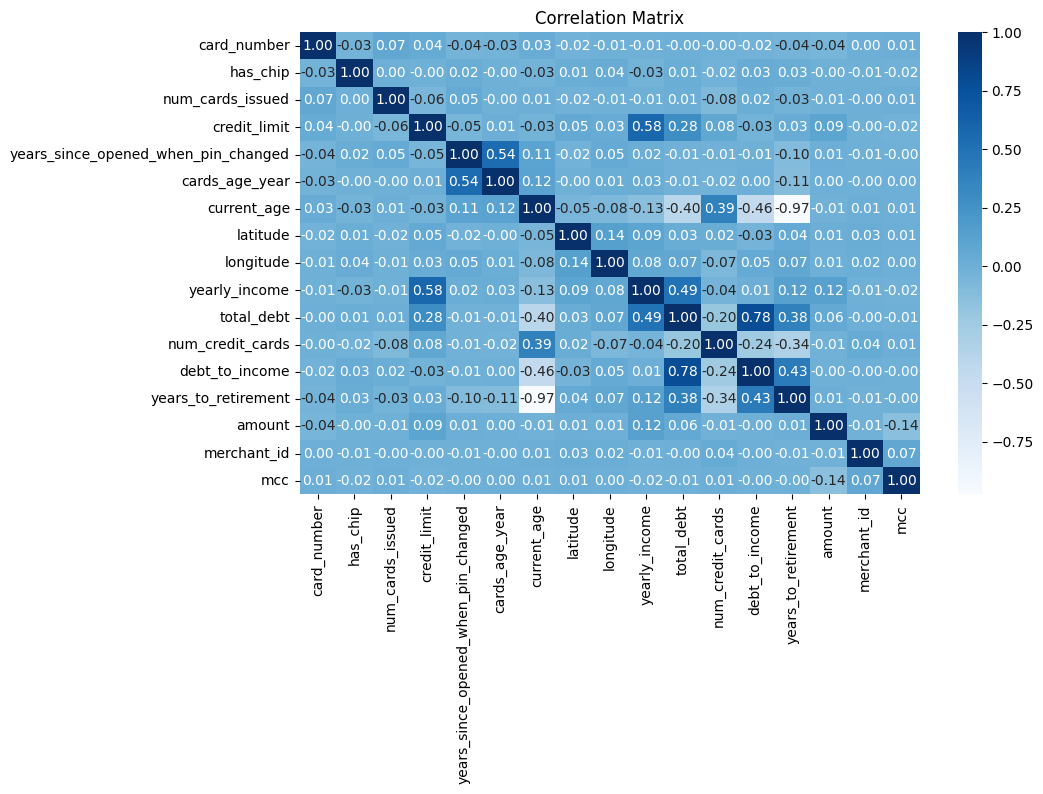

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

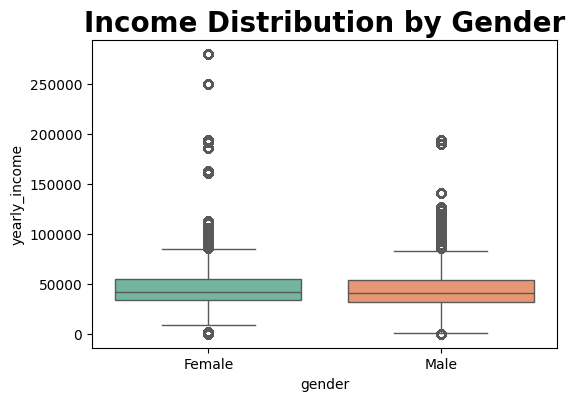

In [90]:
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='yearly_income', data=df,palette='Set2')
plt.title("Income Distribution by Gender",fontsize=20,fontweight='bold')
plt.show()

In [91]:
income_brand=df.groupby(['current_age','income_bin','card_brand'])['total_debt'].mean().reset_index().sort_values(by='total_debt',ascending=False).head(10)
income_brand

,current_age,income_bin,card_brand,total_debt
34,32,High,Amex,252106.000000
519,66,Very High,Visa,234240.538786
518,66,Very High,Mastercard,220744.385670
44,32,Very High,Visa,192458.000000
68,34,Very High,Mastercard,189646.401609
437,60,Very High,Visa,181047.636953
160,41,Very High,Mastercard,179099.293919
107,37,Very High,Mastercard,174665.081381
7,29,High,Mastercard,166903.000000
362,55,Very High,Mastercard,164425.388038



<html lang="en">
<head>
  <meta charset="utf-8" />
  <meta name="viewport" content="width=device-width,initial-scale=1" />
  <title>Relationship Insights — Customer → Card → Transaction</title>
  <style>
    :root{--bg:#0f1724;--card:#0b1220;--muted:#94a3b8;--accent:#06b6d4;--glass:rgba(255,255,255,0.04)}
    *{box-sizing:border-box;font-family:Inter,Segoe UI,Helvetica,Arial,sans-serif}
    body{margin:0;background:linear-gradient(180deg,#071025 0%, #0f1724 100%);color:#e6eef6;padding:28px}
    .container{max-width:1100px;margin:0 auto}
    header{display:flex;align-items:center;gap:16px;margin-bottom:20px}
    header h1{font-size:20px;margin:0}
    header p{margin:0;color:var(--muted);font-size:14px}

.grid{display:grid;grid-template-columns:repeat(3,1fr);gap:18px;margin-top:18px}
    .card{background:var(--card);padding:18px;border-radius:12px;box-shadow:0 6px 18px rgba(2,6,23,0.6);border:1px solid rgba(255,255,255,0.03)}
    .card h3{margin:0 0 8px 0;font-size:16px}
    .muted{color:var(--muted);font-size:13px}

/* Flow arrows */
.flow{display:flex;align-items:center;gap:12px;justify-content:center;margin:22px 0}
    .node{background:linear-gradient(180deg, rgba(255,255,255,0.02), rgba(255,255,255,0.01));padding:12px 16px;border-radius:10px;border:1px solid var(--glass);min-width:160px;text-align:center}
    .arrow{font-size:22px;color:var(--accent)}

/* Relationship table */
 table{width:100%;border-collapse:collapse;margin-top:12px}
    th,td{padding:8px 10px;text-align:left;border-bottom:1px dashed rgba(255,255,255,0.03);font-size:14px}
    th{color:var(--muted);font-weight:600}

.highlight{color:var(--accent);font-weight:700}

/* Responsive */
@media (max-width:900px){.grid{grid-template-columns:1fr}
      .flow{flex-direction:column}
      .arrow{transform:rotate(90deg)}
    }
  </style>
</head>
<body>
  <div class="container">
    <header>
      <div>
        <h1>Relationship Insights: Customer → Card → Transaction</h1>
        <p>Concise descriptions of how each column influences the next stage in the data journey.</p>
      </div>
    </header>

<section class="grid">
      <div class="card">
        <h3>Customer (Profile)</h3>
        <p class="muted">Columns: <span class="highlight">current_age, gender, yearly_income, total_debt, credit_score, num_credit_cards, income_bin, years_to_retirement</span></p>
<table>
          <tr><th>Driver</th><th>Effect</th></tr>
          <tr><td>yearly_income</td><td>Determines <em>income_bin</em> and influences <em>credit_limit</em>.</td></tr>
          <tr><td>total_debt</td><td>Used with income to compute <em>debt_to_income</em> (risk indicator).</td></tr>
          <tr><td>credit_score</td><td>Main predictor of credit offers and limits.</td></tr>
          <tr><td>current_age</td><td>Helps compute <em>years_to_retirement</em> and lifecycle segments.</td></tr>
        </table>
      </div>

<div class="card">
        <h3>Card (Instrument)</h3>
        <p class="muted">Columns: <span class="highlight">card_brand, card_type, card_number, has_chip, num_cards_issued, credit_limit, card_on_dark_web, cards_age_year, years_since_opened_when_pin_changed</span></p>
<table>
          <tr><th>Driver</th><th>Effect</th></tr>
          <tr><td>credit_score & income_bin</td><td>Set <em>credit_limit</em> and eligible <em>card_type</em>.</td></tr>
          <tr><td>has_chip</td><td>Leads to higher probability of <em>use_chip</em> in transactions.</td></tr>
          <tr><td>card_on_dark_web</td><td>Strong signal for increased <em>is_fraud</em> risk.</td></tr>
          <tr><td>cards_age_year</td><td>Older cards show stable usage patterns; new cards may spike fraud.</td></tr>
        </table>
      </div>

<div class="card">
        <h3>Transaction (Event)</h3>
        <p class="muted">Columns: <span class="highlight">date, amount, use_chip, merchant_id, merchant_city, merchant_state, zip, mcc, errors, description, is_fraud</span></p>
        <table>
          <tr><th>Driver</th><th>Effect</th></tr>
          <tr><td>amount</td><td>Large unexpected amounts increase fraud probability.</td></tr>
          <tr><td>use_chip</td><td>False → higher fraud risk; True → lower chargeback risk.</td></tr>
          <tr><td>merchant_city / state</td><td>Geolocation mismatch vs customer increases suspicion.</td></tr>
          <tr><td>errors & description</td><td>Transaction anomalies and odd descriptions raise alerts.</td></tr>
        </table>
      </div>
    </section>

<section class="flow">
      <div class="node">Customer<br><small class="muted">(income, credit_score, age)</small></div>
      <div class="arrow">➜</div>
      <div class="node">Card<br><small class="muted">(credit_limit, has_chip)</small></div>
      <div class="arrow">➜</div>
      <div class="node">Transaction<br><small class="muted">(amount, use_chip, merchant)</small></div>
    </section>
<div class="card" style="margin-top:18px">
      <h3>How to use these insights</h3>
      <ul class="muted">
        <li>Map columns to the three stages and create plots comparing drivers vs outcomes (eg. credit_limit → amount).</li>
        <li>Build grouped visuals: <em>barplots by card_brand + income_bin</em>, <em>boxplots amount vs is_fraud</em>.</li>
        <li>Create engineered features: <em>spending_to_limit = amount / credit_limit</em>, <em>geo_mismatch_flag</em>.</li>
        <li>Prioritize features for modeling: <em>card_on_dark_web, use_chip, debt_to_income, credit_score, amount</em>.</li>
      </ul>
    </div>

  </div>
</body>
</html>


<html lang="en">
<head>
  <meta charset="utf-8" />
  <meta name="viewport" content="width=device-width,initial-scale=1" />
  <title>Relationship Insights — Customer → Card → Transaction</title>
  <style>
    :root{--bg:#0f1724;--card:#0b1220;--muted:#94a3b8;--accent:#06b6d4;--glass:rgba(255,255,255,0.04)}
    *{box-sizing:border-box;font-family:Inter,Segoe UI,Helvetica,Arial,sans-serif}
    body{margin:0;background:linear-gradient(180deg,#071025 0%, #0f1724 100%);color:#e6eef6;padding:28px}
    .container{max-width:1100px;margin:0 auto}
    header{display:flex;align-items:center;gap:16px;margin-bottom:20px}
    header h1{font-size:20px;margin:0}
    header p{margin:0;color:var(--muted);font-size:14px}

.grid{display:grid;grid-template-columns:repeat(3,1fr);gap:18px;margin-top:18px}
    .card{background:var(--card);padding:18px;border-radius:12px;box-shadow:0 6px 18px rgba(2,6,23,0.6);border:1px solid rgba(255,255,255,0.03)}
    .card h3{margin:0 0 8px 0;font-size:16px}
    .muted{color:var(--muted);font-size:13px}

    /* Flow arrows */
.flow{display:flex;align-items:center;gap:12px;justify-content:center;margin:22px 0}
    .node{background:linear-gradient(180deg, rgba(255,255,255,0.02), rgba(255,255,255,0.01));padding:12px 16px;border-radius:10px;border:1px solid var(--glass);min-width:160px;text-align:center}
    .arrow{font-size:22px;color:var(--accent)}

    /* Relationship table */
table{width:100%;border-collapse:collapse;margin-top:12px}
    th,td{padding:8px 10px;text-align:left;border-bottom:1px dashed rgba(255,255,255,0.03);font-size:14px}
    th{color:var(--muted);font-weight:600}

.highlight{color:var(--accent);font-weight:700}

    /* Responsive */
 @media (max-width:900px){.grid{grid-template-columns:1fr}
      .flow{flex-direction:column}
      .arrow{transform:rotate(90deg)}
    }
  </style>
</head>
<body>
  <div class="container">
    <header>
      <div>
        <h1>Relationship Insights: Customer → Card → Transaction</h1>
        <p>Concise descriptions of how each column influences the next stage in the data journey.</p>
      </div>
    </header>

<section class="grid">
      <div class="card">
        <h3>Customer (Profile)</h3>
        <p class="muted">Columns: <span class="highlight">current_age, gender, yearly_income, total_debt, credit_score, num_credit_cards, income_bin, years_to_retirement</span></p>
<table>
          <tr><th>Driver</th><th>Effect</th></tr>
          <tr><td>yearly_income</td><td>Determines <em>income_bin</em> and influences <em>credit_limit</em>.</td></tr>
          <tr><td>total_debt</td><td>Used with income to compute <em>debt_to_income</em> (risk indicator).</td></tr>
          <tr><td>credit_score</td><td>Main predictor of credit offers and limits.</td></tr>
          <tr><td>current_age</td><td>Helps compute <em>years_to_retirement</em> and lifecycle segments.</td></tr>
        </table>
      </div>

<div class="card">
        <h3>Card (Instrument)</h3>
        <p class="muted">Columns: <span class="highlight">card_brand, card_type, card_number, has_chip, num_cards_issued, credit_limit, card_on_dark_web, cards_age_year, years_since_opened_when_pin_changed</span></p>
        <table>
          <tr><th>Driver</th><th>Effect</th></tr>
          <tr><td>credit_score & income_bin</td><td>Set <em>credit_limit</em> and eligible <em>card_type</em>.</td></tr>
          <tr><td>has_chip</td><td>Leads to higher probability of <em>use_chip</em> in transactions.</td></tr>
          <tr><td>card_on_dark_web</td><td>Strong signal for increased <em>is_fraud</em> risk.</td></tr>
          <tr><td>cards_age_year</td><td>Older cards show stable usage patterns; new cards may spike fraud.</td></tr>
        </table>
      </div>

<div class="card">
        <h3>Transaction (Event)</h3>
        <p class="muted">Columns: <span class="highlight">date, amount, use_chip, merchant_id, merchant_city, merchant_state, zip, mcc, errors, description, is_fraud</span></p>
        <table>
          <tr><th>Driver</th><th>Effect</th></tr>
          <tr><td>amount</td><td>Large unexpected amounts increase fraud probability.</td></tr>
          <tr><td>use_chip</td><td>False → higher fraud risk; True → lower chargeback risk.</td></tr>
          <tr><td>merchant_city / state</td><td>Geolocation mismatch vs customer increases suspicion.</td></tr>
          <tr><td>errors & description</td><td>Transaction anomalies and odd descriptions raise alerts.</td></tr>
        </table>
      </div>
    </section>

<section class="flow">
      <div class="node">Customer<br><small class="muted">(income, credit_score, age)</small></div>
      <div class="arrow">➜</div>
      <div class="node">Card<br><small class="muted">(credit_limit, has_chip)</small></div>
      <div class="arrow">➜</div>
      <div class="node">Transaction<br><small class="muted">(amount, use_chip, merchant)</small></div>
    </section>

<div class="card" style="margin-top:18px">
      <h3>How to use these insights</h3>
      <ul class="muted">
        <li>Map columns to the three stages and create plots comparing drivers vs outcomes (eg. credit_limit → amount).</li>
        <li>Build grouped visuals: <em>barplots by card_brand + income_bin</em>, <em>boxplots amount vs is_fraud</em>.</li>
        <li>Create engineered features: <em>spending_to_limit = amount / credit_limit</em>, <em>geo_mismatch_flag</em>.</li>
        <li>Prioritize features for modeling: <em>card_on_dark_web, use_chip, debt_to_income, credit_score, amount</em>.</li>
      </ul>
    </div>

<section class="card" style="margin-top:18px">
      <h3>Plot Description — Total Debt by Card Brand Across Income Groups</h3>
      <p class="muted">This visualization compares <strong>Total Debt</strong> across different <strong>Card Brands</strong>, broken down by <strong>Income Bin</strong> (income groups). Use this section as a caption and interpretation guide for the barplot.</p>
<table>
        <tr><th>What the chart shows</th><th>Quick interpretation</th></tr>
        <tr><td>Bar height per <em>card_brand</em></td><td>Average <em>total_debt</em> for customers holding that brand.</td></tr>
        <tr><td>Hue = <em>income_bin</em></td><td>Within each brand, bars for different income bins show whether higher or lower income groups carry more debt.</td></tr>
        <tr><td>Comparing brands</td><td>Helps identify which card brands are associated with higher indebtedness overall and within income segments.</td></tr>
      </table>

<h4 style="margin-top:12px">Key insights to highlight</h4>
      <ul class="muted">
        <li>If high-income bins consistently show higher <em>total_debt</em> for a brand, this may reflect higher credit limits or premium product targeting.</li>
        <li>If low-income bins show disproportionately high debt for a brand, this could indicate credit risk and be worth investigating for default risk.</li>
        <li>Large differences between income bins within a brand suggest that income is a strong moderator for debt behavior on that brand.</li>
      </ul>

<h4 style="margin-top:12px">Suggested caption for the plot</h4>
      <p class="muted"><em>"Average Total Debt per Card Brand, segmented by Income Bin — reveals how indebtedness varies by both card provider and customer income group."</em></p>

<h4 style="margin-top:12px">Next analytical steps</h4>
      <ol class="muted">
        <li>Run statistical tests (e.g., ANOVA) to see if differences in total_debt between brands or income bins are significant.</li>
        <li>Compute <strong>debt_to_income</strong> per group to normalize debt by income and reveal true risk patterns.</li>
        <li>Examine <em>credit_limit</em> alongside <em>total_debt</em> to understand utilization ratios per brand & income bin.</li>
      </ol>
    </section>
  </div>
</body>
</html>


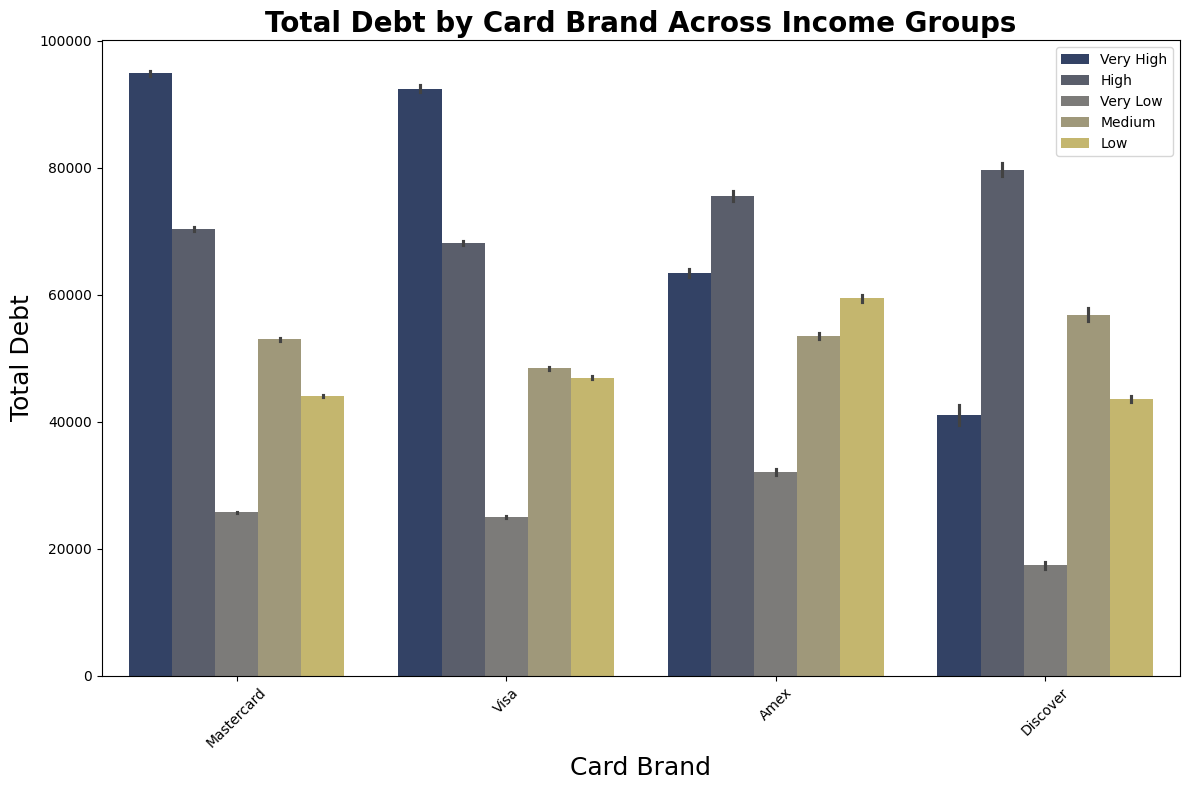

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='card_brand',y='total_debt',hue='income_bin',data=df,palette='cividis')
plt.title('Total Debt by Card Brand Across Income Groups',fontsize=20,fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Card Brand',fontsize=18)
plt.ylabel('Total Debt',fontsize=18)
plt.legend()
plt.tight_layout()SS
plt.show()

In [93]:
discover = df[df['card_brand']=='Discover']
discover_brand_info = discover.groupby(['credit_limit','income_bin'])['debt_to_income'].mean().reset_index().sort_values(by='debt_to_income',ascending=False).head(20)
discover_brand_info

,credit_limit,income_bin,debt_to_income
6,3600,Very Low,3.527115
45,10300,High,2.937809
87,17400,Medium,2.926243
20,7600,Medium,2.926243
9,4700,Very Low,2.923264
70,13400,High,2.886334
29,8600,Low,2.580579
8,4000,Low,2.453656
16,6900,Low,2.453656
71,13600,Very High,2.446597


<div style="background:#f9f9f9; padding:15px; border-left:5px solid #E63946; border-radius:10px; max-width:700px; font-family:Arial, sans-serif;">
  <h3 style="margin-top:0; color:#333;">Key Insights: Discover Card Debt-to-Income</h3>
  <ul style="color:#444; line-height:1.6;">
    <li>Very Low income customers show the <b>highest debt-to-income ratios</b> across all credit limits.</li>
    <li>Debt burden decreases gradually for Medium, High, and Very High income groups.</li>
    <li>Lower credit limits are mostly associated with Very Low and Low income segments.</li>
    <li>Higher credit limits are dominated by Medium and High income bins with more stable ratios.</li>
    <li>This suggests higher financial risk in the Very Low income segment, even at small credit limits.</li>
  </ul>
</div>


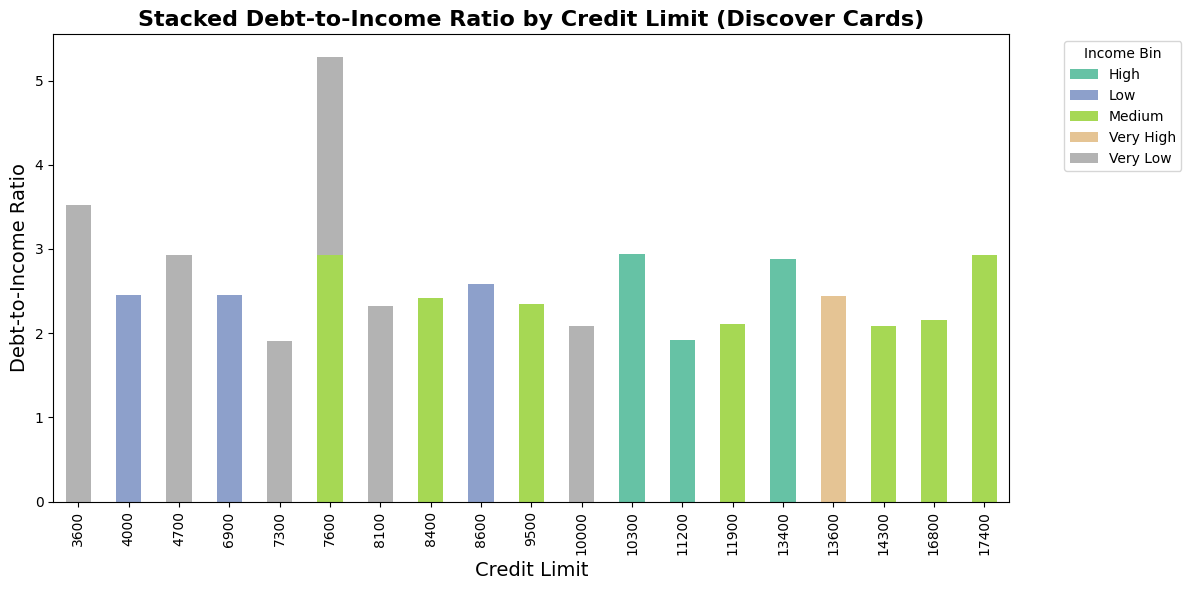

In [94]:
pivot_df = discover_brand_info.pivot_table(
    index='credit_limit', 
    columns='income_bin', 
    values='debt_to_income', 
    aggfunc='mean'
)


pivot_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title('Stacked Debt-to-Income Ratio by Credit Limit (Discover Cards)', fontsize=16, fontweight='bold')
plt.xlabel('Credit Limit', fontsize=14)
plt.ylabel('Debt-to-Income Ratio', fontsize=14)
plt.legend(title='Income Bin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [95]:
credit_limit_amount = df.groupby(['card_brand','credit_limit','income_bin'])['amount'].sum().reset_index().sort_values(by='amount',ascending=False).head(20)
credit_limit_amount

,card_brand,credit_limit,income_bin,amount
944,Mastercard,12047,High,216349.34
1500,Mastercard,25422,Very High,211903.02
106,Amex,13400,Medium,196389.21
1700,Mastercard,53466,Very High,171683.05
140,Amex,18000,Very High,166385.33
1295,Mastercard,18300,Very High,155339.88
852,Mastercard,10600,Low,145381.03
1335,Mastercard,19554,Low,140652.26
2090,Visa,10000,Low,133629.50
2521,Visa,22500,Very High,129745.44


<div style="background:#f9f9f9; padding:15px; border-left:5px solid #2196F3; border-radius:10px; max-width:750px; font-family:Arial, sans-serif;">
  <h3 style="margin-top:0; color:#333;">Key Insights: Top 20 Credit Limits by Total Transaction Amount</h3>
  <ul style="color:#444; line-height:1.6;">
    <li>Highest transaction amounts come from <b>High</b> and <b>Very High</b> income customers at large credit limits.</li>
    <li>Very High income group dominates the top credit limits (e.g., 25422, 53466).</li>
    <li>Low income customers still appear among the top spenders at mid credit limits (e.g., 10000, 10600).</li>
    <li>Presence of Very Low income at high credit limit (23237) may indicate potential risk exposure.</li>
    <li>The plot highlights that spending grows with credit limit, but is concentrated among higher income groups.</li>
  </ul>
</div>


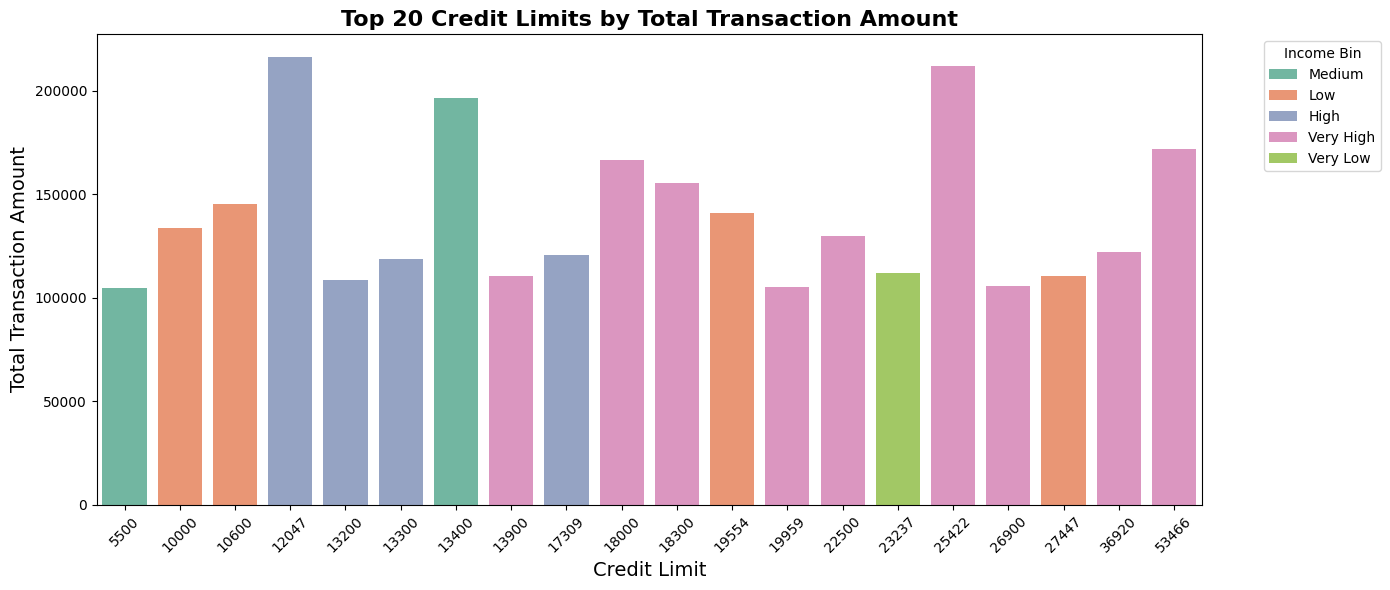

In [96]:
plt.figure(figsize=(14,6))
sns.barplot(x='credit_limit', y='amount', hue='income_bin', data=credit_limit_amount, palette='Set2')
plt.title('Top 20 Credit Limits by Total Transaction Amount', fontsize=16, fontweight='bold')
plt.xlabel('Credit Limit', fontsize=14)
plt.ylabel('Total Transaction Amount', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Income Bin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [97]:
limit = df[df['credit_limit']==23237]
info_23237_limit = limit.groupby(['income_bin','description','mcc'])['amount'].mean().reset_index().sort_values(by='amount',ascending=False).head(10)
info_23237_limit

,income_bin,description,mcc,amount
47,Very Low,Steel Drums and Barrels,3008,716.430000
15,Very Low,Computer Network Services,3780,436.456667
9,Very Low,"""Tools",3058,408.880000
27,Very Low,Industrial Equipment and Supplies,3509,380.550000
5,Very Low,"""Insurance Sales",6300,353.852727
6,Very Low,"""Lighting",3640,344.970000
31,Very Low,Medical Services,8099,313.420000
45,Very Low,Ship Chandlers,3730,286.330000
43,Very Low,Semiconductors and Related Devices,3684,274.636667
25,Very Low,Gardening Supplies,3504,268.445000


<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Insight Summary</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            /* 🌈 Background Gradient */
            background: linear-gradient(135deg, #e0f7fa, #f1f8e9);
            color: black; /* ✅ All text will be black */
        }
        .card {
            background: white;
            padding: 20px;
            border-radius: 12px;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.15);
            max-width: 500px;
            transition: transform 0.2s ease-in-out;
        }
        .card:hover {
            transform: scale(1.03);
        }
        h2 {
            color: black; /* ✅ Heading is also black */
            text-align: center;
            margin-bottom: 10px;
        }
        ul {
            list-style: none;
            padding: 0;
        }
        li {
            margin: 8px 0;
            padding: 10px;
            background: #f9fbe7;
            border-radius: 8px;
            color: black; /* ✅ List text black */
        }
        .highlight {
            font-weight: bold;
            color: black; /* ✅ Highlight text also black */
        }
    </style>
</head>
<body>
    <div class="card">
        <h2>Insight: Credit Limit 23237 (Very Low Income)</h2>
        <ul>
            <li>The top spending category is <span class="highlight">Steel Drums and Barrels</span>.</li>
            <li>Average transaction amount: <span class="highlight">716.43</span>.</li>
            <li>This indicates consistent spending on industrial-related purchases.</li>
            <li>Businesses or individuals in this group likely use this limit for work-related needs.</li>
            <li>Bank can target them with offers for manufacturing or logistics services.</li>
        </ul>
    </div>
</body>
</html>


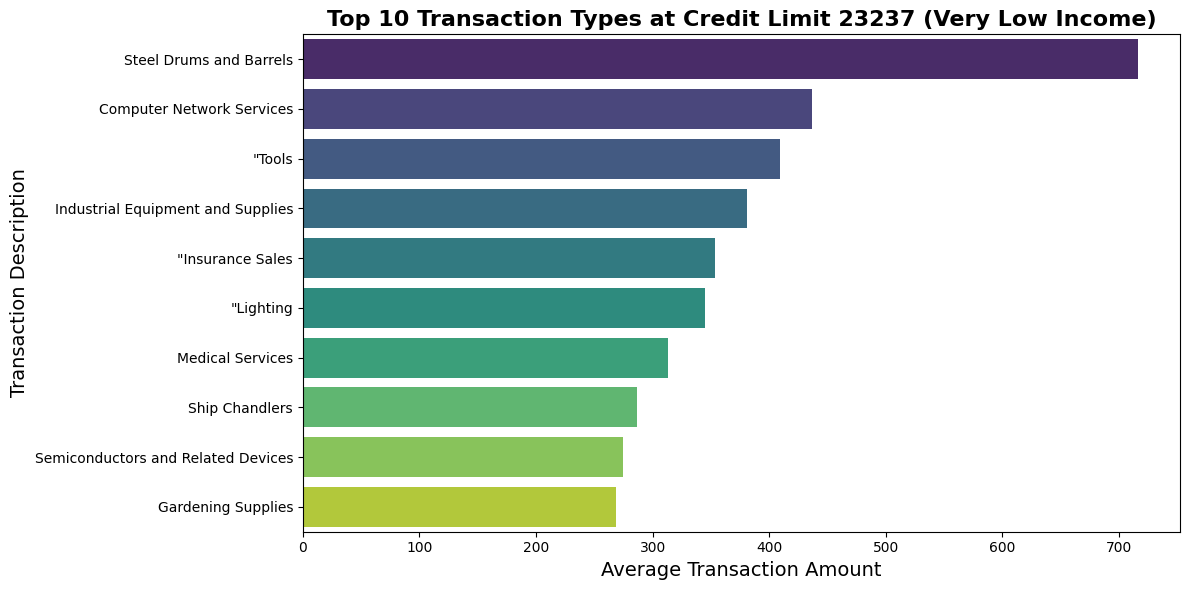

In [98]:
plt.figure(figsize=(12,6))
sns.barplot(x='amount', y='description', data=info_23237_limit, palette='viridis')
plt.title('Top 10 Transaction Types at Credit Limit 23237 (Very Low Income)', fontsize=16, fontweight='bold')
plt.xlabel('Average Transaction Amount', fontsize=14)
plt.ylabel('Transaction Description', fontsize=14)
plt.tight_layout()
plt.show()

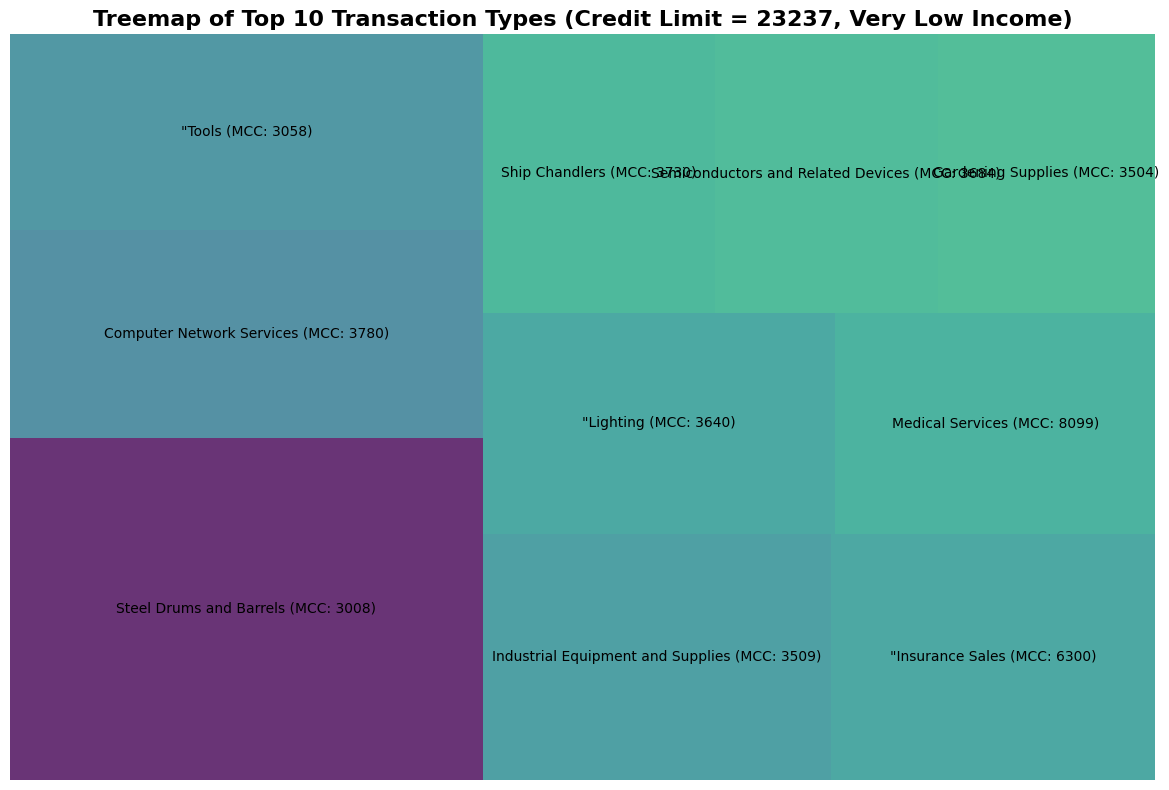

In [99]:
import squarify
info_23237_limit['desc_mcc'] = info_23237_limit['description'] + " (MCC: " + info_23237_limit['mcc'].astype(str) + ")"


plt.figure(figsize=(12,8))
squarify.plot(
    sizes=info_23237_limit['amount'], 
    label=info_23237_limit['desc_mcc'],
    alpha=0.8,
    color=plt.cm.viridis_r(info_23237_limit['amount'] / info_23237_limit['amount'].max()) 
)
plt.title('Treemap of Top 10 Transaction Types (Credit Limit = 23237, Very Low Income)', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

In [100]:
# spending_to_limit = amount / credit_limit
df['spending_to_limit'] = df['amount'] / df['credit_limit']
df['spending_to_limit'].replace([np.inf, -np.inf], 0, inplace=True) # credit limit = 0
df['spending_to_limit']

0          0.000207
1          0.000378
2          0.000289
3          0.000012
4          0.005386
             ...   
1048570    0.000897
1048571    0.005916
1048572    0.000515
1048573    0.000636
1048574    0.001789
Name: spending_to_limit, Length: 1048575, dtype: float64

In [101]:
spending_to_limit = df.groupby(['current_age','income_bin'])['spending_to_limit'].sum().reset_index().sort_values(by='spending_to_limit',ascending=False)
spending_to_limit

,current_age,income_bin,spending_to_limit
179,63,Very Low,3570.283721
168,61,Very High,970.545834
95,47,High,860.244877
39,35,Very Low,838.790528
99,47,Very Low,820.245226
...,...,...,...
216,71,Very High,1.585277
234,77,High,1.511008
4,28,Very High,1.251209
59,39,Very Low,1.173000


<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Spending-to-Limit Insights</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f8f9fa;
            color: black; /* ✅ Global font color set to black */
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh;
        }
        .insight-box {
            background: white;
            padding: 20px;
            border-radius: 12px;
            box-shadow: 0 4px 10px rgba(0,0,0,0.1);
            max-width: 700px;
            line-height: 1.6;
            color: black; /* ✅ Ensures text stays black inside the box */
        }
        h2 {
            text-align: center;
            color: black; /* ✅ Heading is black */
            margin-bottom: 15px;
        }
        ul {
            list-style: none;
            padding-left: 0;
        }
        li {
            margin-bottom: 10px;
            padding: 8px 12px;
            background: #eef2f3;
            border-radius: 8px;
            color: black; /* ✅ List text black */
        }
        .highlight {
            color: black; /* ✅ Highlighted text now black */
            font-weight: bold;
        }
    </style>
</head>
<body>
    <div class="insight-box">
        <h2>Spending-to-Limit Insights by Age & Income</h2>
        <ul>
            <li> The <span class="highlight">highest spending-to-limit spike</span> occurs around age 62, mainly from <strong>very low income</strong> customers.</li>
            <li> Younger ages (30–40) show moderate spending, distributed across multiple income bins.</li>
            <li> Most of the spending contribution comes from <span class="highlight">low and very low income bins</span>.</li>
            <li> After age 70, spending-to-limit ratio significantly drops across all income levels.</li>
            <li> This indicates a <span class="highlight">risk concentration</span> among older low-income users, useful for credit risk and fraud monitoring.</li>
        </ul>
    </div>
</body>
</html>


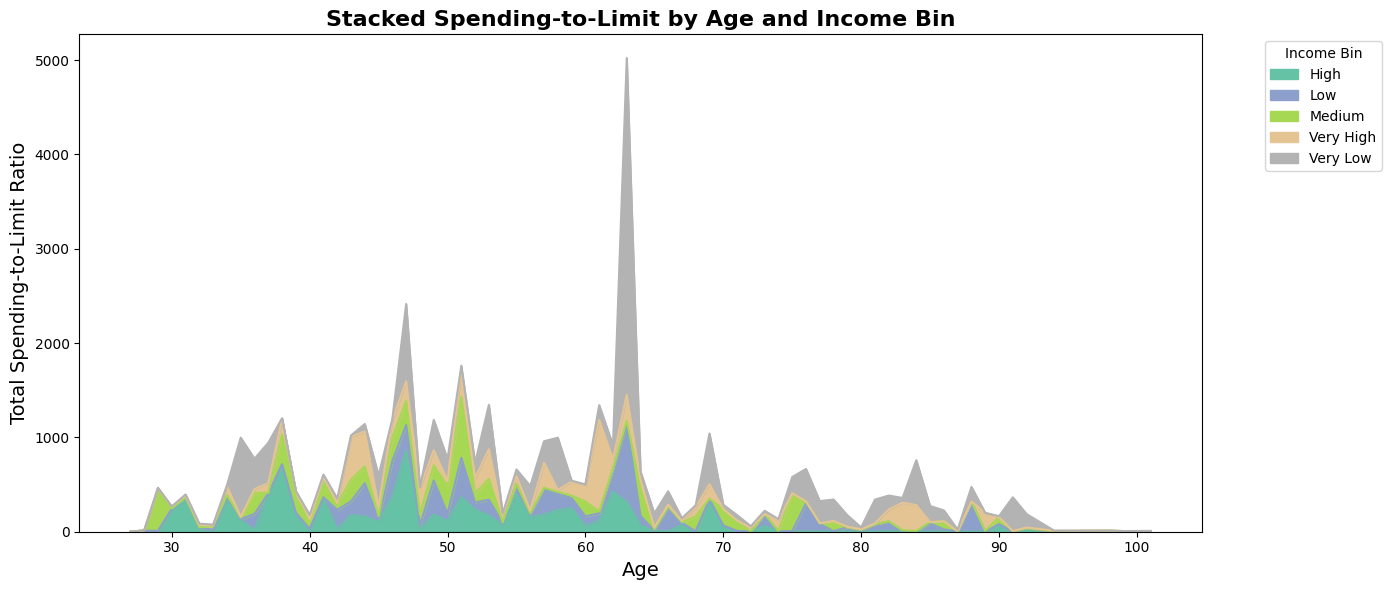

In [102]:
pivot_df = spending_to_limit.pivot_table(
    index='current_age',
    columns='income_bin',
    values='spending_to_limit',
    aggfunc='sum'
)
pivot_df.plot(kind='area', stacked=True, figsize=(14,6), colormap='Set2')

plt.title('Stacked Spending-to-Limit by Age and Income Bin', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Total Spending-to-Limit Ratio', fontsize=14)
plt.legend(title='Income Bin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [4]:
df.to_csv('Financial_Transaction.csv',index=False)